#Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load Data


In [2]:
df = pd.read_csv("breast-cancer-wisconsin.data", header=None)
df.head()
#df.info()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


#Cleaning
*   Rename Columns
* Dealing with missing values
*   Searching for duplicates
*   Data Type





In [3]:
#Rename Columns 
df.rename(columns={0:'ID',1:'Clump Thickness',2:'Uniformity of Cell Size',3:'Uniformity of Cell Shape',4:'Marginal Adhesion',
5:'Single Epithelial Cell Size',6:'Bare Nuclei',7:'Bland Chromatin',8:'Normal Nucleoli',
                 9:'Mitoses',10:'Class'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
#for i in df:
#    print(df[i].unique())
df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [5]:
#Missing Values
df.isna().sum()

ID                             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [6]:
df['Bare Nuclei'].replace('?',0,inplace=True)

In [7]:
#casting data type 
df['Bare Nuclei'] = df['Bare Nuclei'].astype('int')
df.dtypes

ID                             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [8]:
df['Bare Nuclei'].replace(0,df['Bare Nuclei'].median(),inplace=True)

In [9]:
#Searching for duplicates
df.duplicated().sum()

9

In [11]:
#drop duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()


0

#Generating Model

In [12]:
#Import Modules
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [16]:
#Split dataset into training set and test set
lable = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(df, lable , test_size=0.3)

In [17]:
#Create KNN Classifier, K=9
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=9)

In [18]:
y_pred = knn.predict(X_test)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2,
       4, 4, 2, 4, 2, 2, 2, 2, 2])

In [19]:
#Accuracy Calculation
print(knn.score(X_test, y_test))


0.642512077294686


In [20]:
#DataSet Accuracy
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


In [21]:
#Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  


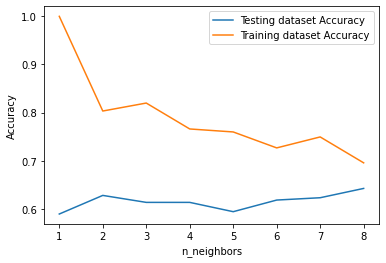

In [22]:
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [156]:
##
features =df[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
lable = df["Class"]

In [173]:
3#
model = KNeighborsClassifier(n_neighbors=3)
model.fit(features, 
          lable)


KNeighborsClassifier(n_neighbors=3)

In [172]:
##
predicted= model.predict([[9,2,3,5,4,6,6,7]])
print(predicted)

[4]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
